# La bibliothèque scipy

Le module scipy comporte les sous-modules importants suivants
* scipy.constants : constantes physiques et mathématiques
* scipy.fftpack : transformée de Fourier discrète
* scipy.integrate : intégration et équations différentielles
* scipy.interpolate : interpolation
* scipy.linalg : algèbre linéaire
* scipy.optimize : optimisation et recherche de racines
* scipy.signal : traitement du signal
* scipy.sparse : matrices creuses
* scipy.stats : fonctions statistiques

## Matrices creuses


\subsection*{Formats de stockage}
\begin{itemize}
    \item \texttt{csc\_matrix} : Compressed Sparse Column
    \item \texttt{csr\_matrix} : Compressed Sparse Row
    \item \texttt{bsr\_matrix} : Block Sparse Row
    \item \texttt{lil\_matrix} : List of Lists
    \item \texttt{dok\_matrix} : Dictionary of Keys
    \item \texttt{coo\_matrix} : COOrdinate
\end{itemize}

(62, 5)
(62, 5)


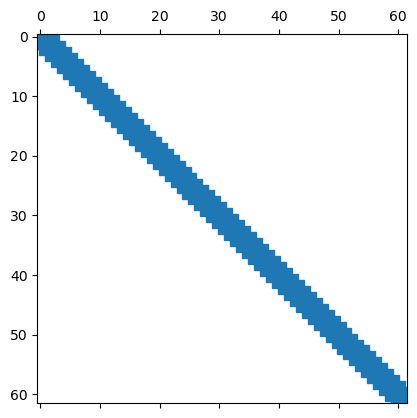

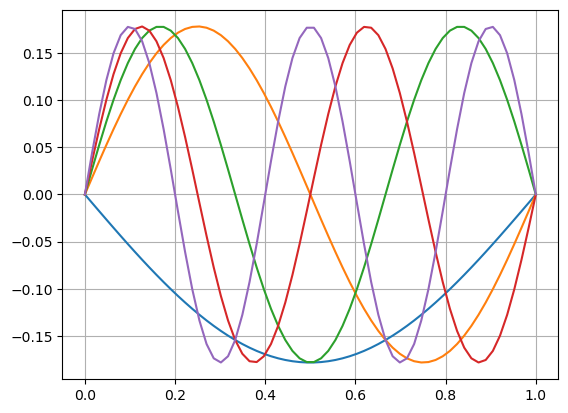

In [2]:
#%matplotlib inline
import scipy
from scipy import sparse
# from scipy.sparse.linalg.dsolve import linsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

class Fdm:
    'grille differences finies'
    fdmCount = 0

    def __init__(self, Lx, Nx):
        self.Lx = Lx
        self.Nx = Nx
        self.N  = Nx
        self.dx = Lx/(Nx-1);
        Fdm.fdmCount += 1
   
    def displayCount(self):
        print ("Instances {:d}".format(Fdm.fdmCount)) 
                
    def __dirichlet(self):
        self.ld = [0, self.Nx-1]                  
        self.ld = np.unique(self.ld)

    def __build_K(self):    
        row  = []
        col  = []
        data = []

        D=2/self.dx**2;        
        for ix in range(self.Nx):
            n=ix  
            if n in self.ld: # test d'appartenance
                continue
            else:
                row.append(n)
                col.append(n)
                data.append(D)
                    
                p=ix+1
                row.append(n)
                col.append(p)
                data.append(-1/self.dx**2)

                p=ix-1
                row.append(n)
                col.append(p)
                data.append(-1/self.dx**2)
                    
        K=sparse.csr_matrix( (data,(row,col)), shape=(self.N, self.N) )
        return K

    def solve(self, n):
        self.__dirichlet();
        K = self.__build_K();
        UN= np.ones(self.N)
        P=sparse.diags(UN).tocsr()
        P=delete_rows(P, self.ld)
#        print(fdm.ld)
#        print('P shape : ', P.shape)      
        Kp=P @ K @ P.T

        # seconde méthode plus efficace en utilisant le slicing
        all_dofs = range(self.N)
        free_dofs = [x for x in all_dofs if x not in self.ld]
        Kp = K[free_dofs, :][:, free_dofs]
        
#        print(Kp.shape)
        plt.figure(1)
        plt.spy(Kp)

        vals, vecs = sparse.linalg.eigsh(Kp, k=n, which='SM')
        print(vecs.shape)
        vecs_full = P.T*vecs
        print(vecs.shape)

        vecs_full = np.zeros(shape=(self.N, n))
        vecs_full[free_dofs, :] = vecs

        plt.figure(2)
        X = np.linspace(0, self.Lx, num=self.Nx, endpoint=True)
#        print(vecs[:, n-1])
        for i in range(n):
            Y = vecs_full[:, i]
            plt.plot(X, Y)
        plt.grid()
        plt.show()

def delete_rows(mat, indices):
    valid = isinstance(mat, scipy.sparse.lil_matrix) or \
            isinstance(mat, scipy.sparse.csr_matrix)
    if not valid:
        raise ValueError("works only for LIL / CSR format -- use .tolil() / .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]


fdm = Fdm(1.0, 64)
fdm.solve(5)


(62, 5)
(62, 5)


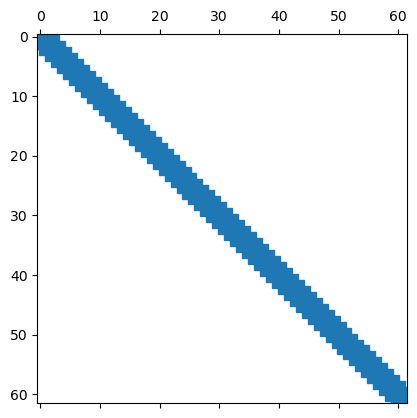

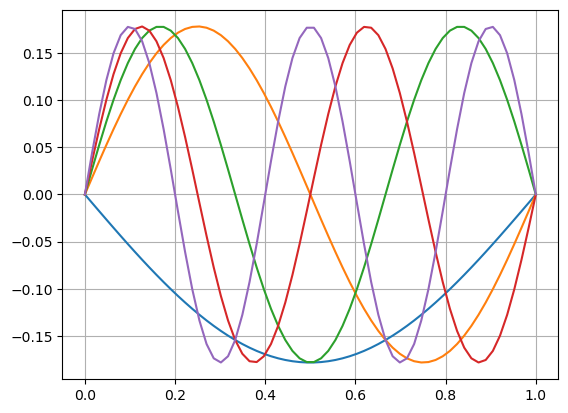

In [2]:
#%matplotlib inline
import scipy
from scipy import sparse
# from scipy.sparse.linalg.dsolve import linsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

class Fdm:
    'grille differences finies'
    fdmCount = 0

    def __init__(self, Lx, Nx):
        self.Lx = Lx
        self.Nx = Nx
        self.N  = Nx
        self.dx = Lx/(Nx-1);
        Fdm.fdmCount += 1
   
    def displayCount(self):
        print ("Instances {:d}".format(Fdm.fdmCount)) 
                
    def __dirichlet(self):
        self.ld = [0, self.Nx-1]                  
        self.ld = np.unique(self.ld)

    def __build_K(self):    
        row  = []
        col  = []
        data = []

        D=2/self.dx**2;        
        for ix in range(self.Nx):
            n=ix  
            if n in self.ld: # test d'appartenance
                continue
            else:
                row.append(n)
                col.append(n)
                data.append(D)
                    
                p=ix+1
                row.append(n)
                col.append(p)
                data.append(-1/self.dx**2)

                p=ix-1
                row.append(n)
                col.append(p)
                data.append(-1/self.dx**2)
                    
        K=sparse.csr_matrix( (data,(row,col)), shape=(self.N, self.N) )
        return K

    def solve(self, n):
        self.__dirichlet();
        K = self.__build_K();
        UN= np.ones(self.N)
        P=sparse.diags(UN).tocsr()
        P=delete_rows(P, self.ld)
#        print(fdm.ld)
#        print('P shape : ', P.shape)      
        Kp=P @ K @ P.T

        # seconde méthode plus efficace en utilisant le slicing
        all_dofs = range(self.N)
        free_dofs = [x for x in all_dofs if x not in self.ld]
        Kp = K[free_dofs, :][:, free_dofs]
        
#        print(Kp.shape)
        plt.figure(1)
        plt.spy(Kp)

        vals, vecs = sparse.linalg.eigsh(Kp, k=n, which='SM')
        print(vecs.shape)
        vecs_full = P.T*vecs
        print(vecs.shape)

        vecs_full = np.zeros(shape=(self.N, n))
        vecs_full[free_dofs, :] = vecs

        plt.figure(2)
        X = np.linspace(0, self.Lx, num=self.Nx, endpoint=True)
#        print(vecs[:, n-1])
        for i in range(n):
            Y = vecs_full[:, i]
            plt.plot(X, Y)
        plt.grid()
        plt.show()

def delete_rows(mat, indices):
    valid = isinstance(mat, scipy.sparse.lil_matrix) or \
            isinstance(mat, scipy.sparse.csr_matrix)
    if not valid:
        raise ValueError("works only for LIL / CSR format -- use .tolil() / .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]


fdm = Fdm(1.0, 64)
fdm.solve(5)
